In [2]:
from imblearn.combine import SMOTETomek

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
    
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('preprocessed.csv',index_col=0)
print(data.shape)
data.head()

(10491, 20)


,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0,0,0,0,1,0,0,0,0,0,1
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0,0,0,0,1,0,1,0,0,0,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0,0,0,0,1,0,0,0,1,0,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0,0,1,0,0,0,0,0,0,0,1
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0,0,0,0,1,0,0,1,0,0,0


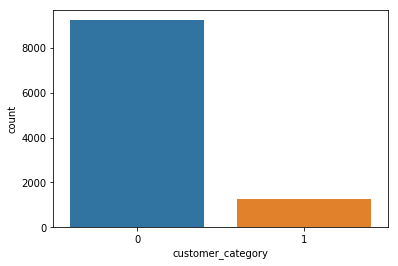

In [4]:
sns.countplot(x='customer_category',data=data)

In [4]:
# As we have seen in the EDA that the data is imbalanced , i.e. more datapoints belongs to the category 0 ,
# so the model we will train will mostly predict category 0 .
# to solve this problem we use OVER SAMPLINg to make the data balanced

In [5]:
X=data.drop(['customer_category','customer_id'],axis=1)
y=data.customer_category

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)


In [7]:
smk = SMOTETomek(random_state=1)
X_res,y_res=smk.fit_sample(x_train,y_train)

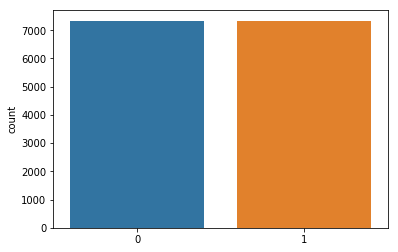

In [8]:
sns.countplot(y_res)

In [9]:
def performance(model,x_train=X_res,y_train=y_res,x_test=x_test,y_test=y_test):
    model.fit(x_train,y_train)
    print('Training accuracy - ',accuracy_score(model.predict(x_train),y_train))
    print('Validation accuracy - ',accuracy_score(model.predict(x_test),y_test))
    print('Precision score - ',precision_score(y_test,model.predict(x_test)))

## Logistic regression 

In [10]:
lr = LogisticRegression()
performance(lr)

Training accuracy -  0.9412486368593239
Validation accuracy -  0.9723677941877085
Precision score -  0.8713235294117647


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Random Forest classifier

In [11]:
rf = RandomForestClassifier()
performance(rf)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy -  0.998773173391494
Validation accuracy -  0.9742734635540734
Precision score -  0.9153225806451613


## Xg Boost classifier

In [13]:
xg = XGBClassifier()
performance(xg)

Training accuracy -  0.973077971646674


ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17'] ['customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score', 'customer_active_segment_A', 'customer_active_segment_AA', 'customer_active_segment_B', 'customer_active_segment_C', 'customer_active_segment_D', 'X1_A', 'X1_AA', 'X1_BA', 'X1_E', 'X1_F']
expected f14, f5, f4, f7, f8, f15, f0, f6, f13, f16, f10, f2, f17, f1, f9, f12, f3, f11 in input data
training data did not have the following fields: customer_frequency_score, X1_A, customer_order_score, customer_active_segment_C, X1_AA, customer_ctr_score, customer_product_variation_score, customer_active_segment_D, customer_active_segment_A, customer_affinity_score, X1_BA, customer_visit_score, customer_stay_score, customer_active_segment_AA, customer_product_search_score, customer_active_segment_B, X1_E, X1_F

# In conclusion the precision score of random forest classifier model is best 

In [13]:
#using the test.csv to make final prediction.
# we need to do all the data cleaning process on test data to make predictions.


In [14]:
test=pd.read_csv('test.csv')
test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [15]:
test.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

In [16]:
mean_customer_product_search_score=test['customer_product_search_score'].mean()
mean_customer_stay_score=test['customer_stay_score'].mean()
mean_customer_product_variation_score=test['customer_product_variation_score'].mean()
mean_customer_order_score =test['customer_order_score'].mean()
mode_customer_active_segment=test['customer_active_segment'].mode()
mode_X1=test['X1'].mode()

In [17]:
print(mode_customer_active_segment)
print(mode_X1)

0    C
dtype: object
0    BA
dtype: object


In [18]:
test['customer_product_search_score'].fillna(mean_customer_product_search_score,inplace=True)
test['customer_stay_score'].fillna(mean_customer_stay_score,inplace=True)
test['customer_product_variation_score'].fillna(mean_customer_product_variation_score,inplace=True)
test['customer_order_score'].fillna(mean_customer_order_score,inplace=True)
test['customer_active_segment'].fillna('C',inplace=True)
test['X1'].fillna('BA',inplace=True)

In [19]:
test.isnull().sum()

customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64

In [20]:
dummy=pd.get_dummies(test['customer_active_segment']).rename(columns=lambda x: 'customer_active_segment_' + str(x))

In [34]:
dummy.head()

,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [35]:
test1=pd.concat([test,dummy],axis=1)
test1.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA,0,0,1,0,0
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA,0,0,1,0,0
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA,0,0,1,0,0
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA,0,0,1,0,0
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA,0,0,0,1,0


In [24]:
dummy1=pd.get_dummies(test1['X1']).rename(columns=lambda x: 'X1_' + str(x))

In [25]:
test1=pd.concat([test1,dummy1],axis=1)
test1.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,...,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,...,0,0,1,0,0,0,0,1,0,0
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,...,0,0,1,0,0,0,1,0,0,0
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,...,0,0,1,0,0,0,1,0,0,0
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,...,0,0,1,0,0,0,0,1,0,0
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,...,0,0,0,1,0,0,0,1,0,0


In [26]:
test1.drop(['customer_active_segment','X1'],axis=1,inplace=True)

test1.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,0,0,1,0,0,0,0,1,0,0
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,0,0,1,0,0,0,1,0,0,0
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,0,0,1,0,0,0,1,0,0,0
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,0,0,1,0,0,0,0,1,0,0
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,0,0,0,1,0,0,0,1,0,0


In [27]:
test2=test1.drop(['customer_id'],axis=1)

In [28]:
customer_category=lr.predict(test2)

In [29]:
customer_category

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [30]:
submission=pd.DataFrame()

In [31]:
submission['customer_id']=test1['customer_id']
submission['customer_category']=customer_category

In [36]:
submission.head()

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,0


In [33]:
submission.to_csv("Submission1.csv",index=False)